In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('canada_edu_gdpless_new.csv')

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UIS.NIRA.1             132 non-null    float64
 1   UIS.XSPENDP.FDPUB.FNS  132 non-null    float64
 2   BAR.PRM.SCHL           132 non-null    float64
 3   BAR.SEC.SCHL           132 non-null    float64
 4   BAR.TER.SCHL           132 non-null    float64
 5   BAR.TOT.SCHL           132 non-null    float64
 6   BAR.NOED.15UP.ZS       132 non-null    float64
 7   BAR.PRM.CMPT.15UP.ZS   132 non-null    float64
 8   BAR.PRM.ICMP.15UP.ZS   132 non-null    float64
 9   BAR.SEC.CMPT.15UP.ZS   132 non-null    float64
 10  BAR.SEC.ICMP.15UP.ZS   132 non-null    float64
 11  BAR.TER.CMPT.15UP.ZS   132 non-null    float64
 12  BAR.TER.ICMP.15UP.ZS   132 non-null    float64
 13  SE.XPD.TOTL.GB.ZS      132 non-null    float64
 14  SE.XPD.TERT.ZS         132 non-null    float64
 15  SE.XPD

In [480]:
df.describe()

,UIS.NIRA.1,UIS.XSPENDP.FDPUB.FNS,BAR.PRM.SCHL,BAR.SEC.SCHL,BAR.TER.SCHL,BAR.TOT.SCHL,BAR.NOED.15UP.ZS,BAR.PRM.CMPT.15UP.ZS,BAR.PRM.ICMP.15UP.ZS,BAR.SEC.CMPT.15UP.ZS,...,BAR.TER.ICMP.15UP.ZS,SE.XPD.TOTL.GB.ZS,SE.XPD.TERT.ZS,SE.XPD.TOTL.GD.ZS,SL.TLF.ADVN.ZS,SL.TLF.BASC.ZS,SL.TLF.INTM.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SI.POV.GINI
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,1.320000e+02,132.000000,132.000000
mean,87.924077,68.523050,5.728212,3.936303,0.664131,10.327859,1.324318,11.783333,17.019924,34.515455,...,21.243106,12.620797,29.173650,5.495665,80.853842,50.847396,75.549475,1.168541e+07,1.071246,31.384520
std,10.355950,1.443122,0.161339,0.749743,0.242965,1.059230,0.723423,9.655105,9.838233,12.727319,...,8.434998,1.359169,3.164991,0.708383,4.647852,9.121806,5.664706,3.852675e+06,0.482292,2.140541
min,65.353180,64.612640,5.327333,2.030667,0.199333,7.966000,0.000000,2.240000,4.790000,10.470000,...,4.140000,8.866610,21.698450,4.627190,59.660000,31.830000,65.890999,6.912131e+06,0.160614,26.800000
25%,83.689056,67.092667,5.670000,3.480000,0.503333,9.528667,0.860000,5.150000,9.970000,24.720000,...,17.360000,11.409165,26.938117,5.098340,78.472502,41.939250,72.321111,8.472401e+06,0.710326,29.420000
50%,90.170345,68.887654,5.771333,4.120000,0.670667,10.520000,1.080000,6.800000,12.750000,32.110000,...,22.440000,13.220474,29.585754,5.143453,80.301110,48.395500,73.339333,1.007600e+07,1.057762,31.550000
75%,97.203285,69.468375,5.824000,4.573500,0.754667,11.200000,1.590000,16.820000,23.730000,45.710000,...,24.607500,13.685232,31.593050,6.014610,85.826000,62.696000,80.987980,1.629954e+07,1.312281,33.112500
max,99.957657,74.186705,5.970000,5.083333,1.342000,12.282667,3.770000,40.170000,42.800000,57.040000,...,43.910000,15.578900,36.812210,7.710190,86.860001,66.360001,98.529999,1.950646e+07,3.380294,35.400000


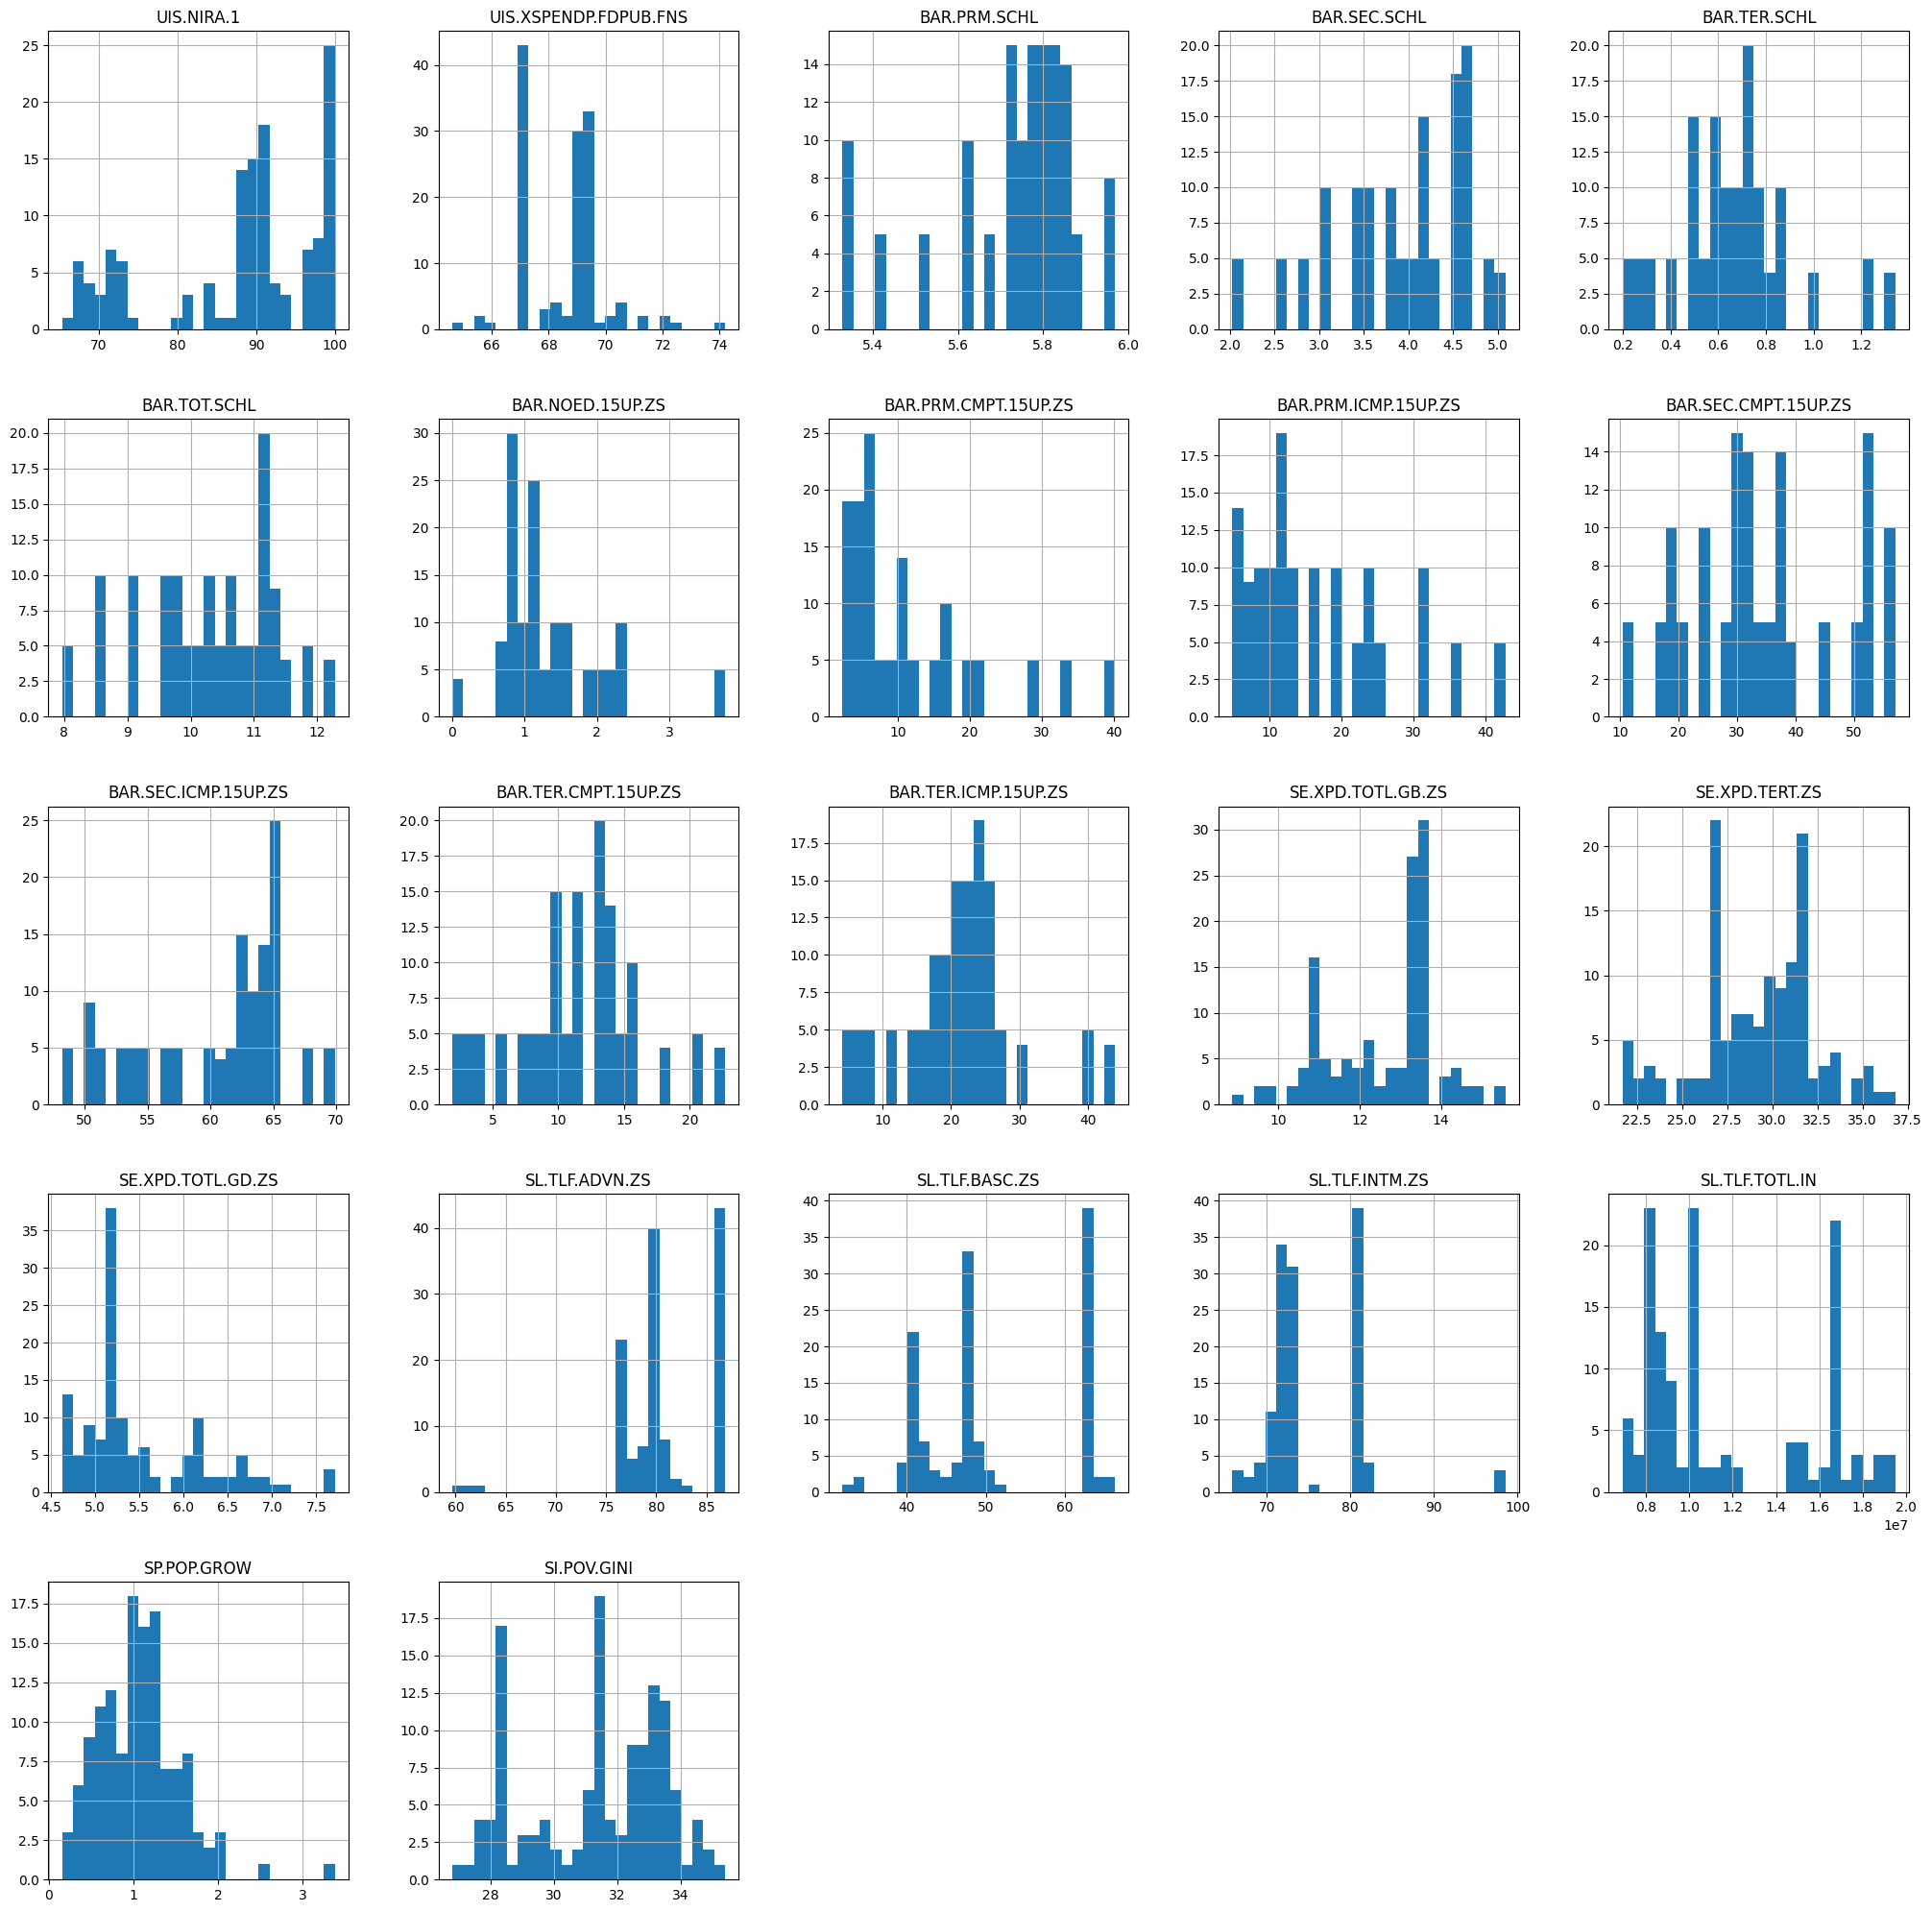

In [481]:
df.hist(bins=25, figsize=(25, 25))
plt.show()

In [482]:
from sklearn.model_selection import train_test_split


y = df['SI.POV.GINI']
X = df.drop('SI.POV.GINI', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [483]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [484]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR()

In [485]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, HalvingRandomSearchCV, RandomizedSearchCV

svr_rmse = -cross_val_score(svr, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error")

pd.Series(svr_rmse).describe()

count    10.000000
mean      0.843039
std       0.312271
min       0.382655
25%       0.594515
50%       0.909833
75%       1.052399
max       1.308614
dtype: float64

In [486]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [487]:
lin_rmse = -cross_val_score(lin_reg, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error")

pd.Series(lin_rmse).describe()

count    10.000000
mean      0.816086
std       0.307173
min       0.471746
25%       0.630252
50%       0.738436
75%       0.916956
max       1.560271
dtype: float64

In [488]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10)

In [489]:
rfr_rmses = -cross_val_score(rfr, X_train_scaled, y_train, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(rfr_rmses).describe()

count    10.000000
mean      0.866056
std       0.537768
min       0.309168
25%       0.586550
50%       0.633787
75%       1.000091
max       2.096755
dtype: float64

In [490]:
hyperparameters = {
  'kernel': ['poly', 'rbf', 'linear'], 
  'degree': list(range(1,10)),
  'gamma': ['auto', 'scale']
}

svr_search = RandomizedSearchCV(svr, hyperparameters, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=True, n_jobs=-1)
svr_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
                   param_distributions={'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['poly', 'rbf', 'linear']},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [491]:
svr_search.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 9}

In [492]:
final_svr = svr_search.best_estimator_

In [493]:
cv_res_svr_search = pd.DataFrame(svr_search.cv_results_)
cv_res_svr_search.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res_svr_search.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
3,0.001277,0.000934,0.000268,0.000178,rbf,auto,9,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 9}",-0.939210,-1.055230,...,-0.695208,-0.727949,-0.746684,-0.682408,-0.734283,-0.717166,-0.690476,-0.744823,-0.716504,0.021427
8,0.001261,0.001218,0.000251,0.000157,rbf,scale,4,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': 4}",-0.941856,-1.057250,...,-0.689859,-0.728026,-0.744554,-0.686998,-0.734433,-0.714769,-0.689259,-0.742680,-0.716080,0.020900
9,0.000789,0.000361,0.000200,0.000032,rbf,scale,7,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': 7}",-0.941856,-1.057250,...,-0.689859,-0.728026,-0.744554,-0.686998,-0.734433,-0.714769,-0.689259,-0.742680,-0.716080,0.020900
1,0.005589,0.001731,0.001095,0.000503,linear,scale,6,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",-0.722790,-0.960483,...,-0.778537,-0.769266,-0.813843,-0.722208,-0.823158,-0.757066,-0.760008,-0.816662,-0.780765,0.029673
4,0.002476,0.001058,0.000357,0.000413,linear,auto,1,"{'kernel': 'linear', 'gamma': 'auto', 'degree'...",-0.722790,-0.960483,...,-0.778537,-0.769266,-0.813843,-0.722208,-0.823158,-0.757066,-0.760008,-0.816662,-0.780765,0.029673


In [494]:
hyperparameters = {
  'max_depth': list(range(6, 22)),
  'max_features': list(range(4, 12)),
  'n_estimators': list(range(1, 50))
}

_rfr_search = RandomizedSearchCV(rfr, hyperparameters, cv=10, n_iter=20, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=True, n_jobs=-1)
_rfr_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=10),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21],
                                        'max_features': [4, 5, 6, 7, 8, 9, 10,
                                                         11],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [495]:
_rfr_search.best_params_

{'n_estimators': 12, 'max_features': 4, 'max_depth': 16}

In [496]:
_final_rfr = _rfr_search.best_estimator_

In [497]:
from sklearn.metrics import mean_squared_error
from scipy import stats

final_preds_svr = final_svr.predict(X_test_scaled)

final_rmse_svr = mean_squared_error(y_test, final_preds_svr, squared=False)
final_mse_svr = mean_squared_error(y_test, final_preds_svr, squared=True)



print("RMSE:", final_rmse_svr)
print("MSE:", final_mse_svr)

RMSE: 0.6894884721040845
MSE: 0.47539435316442485


In [503]:
squared_errors = (final_preds_svr - y_test) ** 2
squared_errors.std()

0.8117767996922467

In [498]:
final_preds_rfr = _final_rfr.predict(X_test_scaled)

final_rmse_rfr = mean_squared_error(y_test, final_preds_rfr, squared=False)
final_mse_rfr = mean_squared_error(y_test, final_preds_rfr, squared=True)

squared_errors = (final_preds_rfr - y_test) ** 2

print("RMSE:", final_rmse_rfr)
print("MSE:", final_mse_rfr)

RMSE: 0.3722039256092492
MSE: 0.13853576223893552


In [502]:
squared_errors.std()

0.24797680554563123

In [499]:
final_svr.predict(
    np.array(
        [88.04305267,68.88765423,5.334666667,2.763333333,0.499333333,8.596,1.08,16.82,31.97,17.39,48.21,9.66,18.74,13.22047428,31.59305006,6.200091389,76.43441598,41.45066667,73.33933258,16838398.58,1.3978316]).reshape(1, -1))

array([31.66922338])

In [500]:
final_svr.predict(
    np.array(
        [1 for x in range(21)]).reshape(1, -1))

array([31.7899276])